In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
# Load the California housing dataset

# df = pd.read_csv('data/california_housing.csv')
data = fetch_california_housing(as_frame=True)
df = data.frame

In [3]:
# Check the number of rows and columns
print("Dataset shape:", df.shape)

Dataset shape: (20640, 9)


In [4]:
# Get detailed information about the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Generate descriptive statistics for all numeric columns
pd.set_option('display.max_columns', None)  # Show all columns
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [7]:
# Check for missing values in each column
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Text(0, 0.5, 'Frequency')

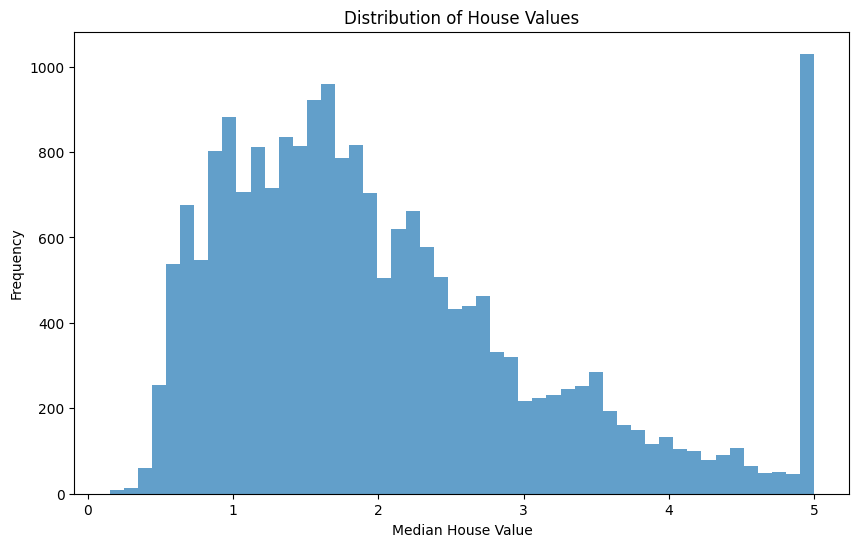

In [8]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
plt.figure(figsize=(10, 6))

# First subplot: histogram of house values
# plt.subplot(1, 2, 1)
# Create histogram with 50 bins and semi-transparent bars
plt.hist(df['MedHouseVal'], bins=50, alpha=0.7)
plt.title('Distribution of House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

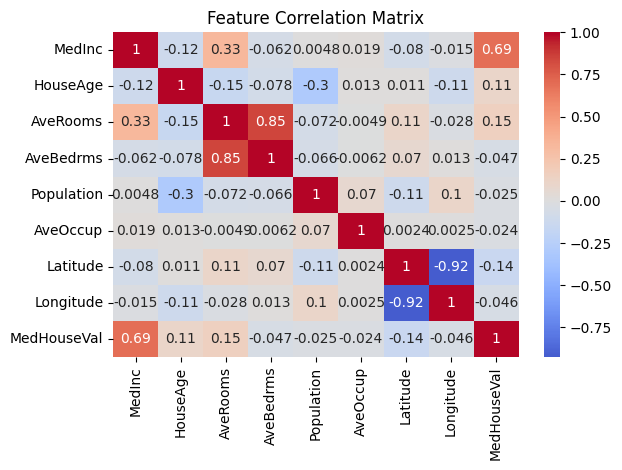

In [9]:
import seaborn as sns

# Second subplot: correlation heatmap
# plt.subplot(1, 2, 2)
# Calculate correlation matrix for all numeric features
correlation_matrix = df.corr()
# Create heatmap with correlation values displayed and centered color scale
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# Set subplot title
plt.title('Feature Correlation Matrix')
# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Feature Engineering

In [10]:
# Create a new feature by dividing average rooms by average occupants
# This tells us how many rooms are available per person in a household
df['RoomsPerHousehold'] = df['AveRooms'] / df['AveOccup']

# Display the first few rows to verify the new feature
print(df[['AveRooms', 'AveOccup', 'RoomsPerHousehold']].head())

   AveRooms  AveOccup  RoomsPerHousehold
0  6.984127  2.555556           2.732919
1  6.238137  2.109842           2.956685
2  8.288136  2.802260           2.957661
3  5.817352  2.547945           2.283154
4  6.281853  2.181467           2.879646


## Splitting the Data into Training and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split

# Define the feature columns to use for modeling
# We include our new engineered feature along with the most promising original features
feature_columns = [
    'MedInc',
    'HouseAge', 
    'AveRooms',
    'AveBedrms',
    'Population',
    'AveOccup',
    'Latitude',
    'Longitude',
    'RoomsPerHousehold'    # Our new engineered feature
]

# Select features (X) and target variable (y)
X = df[feature_columns]
y = df['MedHouseVal']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 16512 samples
Test set size: 4128 samples


## Outlier Handling: Avoiding Data Leakage

### Method: Capping

Capping means setting a maximum limit on your data values. We'll use the 95th percentile as our limit—this is the value below which 95% of your data falls, meaning only the most extreme 5% of values get reduced. For example, if the 95th percentile of AveRooms is 7.65, then any house with more than 7.65 average rooms gets "clipped" down to exactly 7.65. This removes extreme outliers while preserving the vast majority of your data.



In [12]:
# Cap numeric features at their 95th percentiles using ONLY training data
# (excluding geographic coordinates which don't need capping)
features_to_cap = X_train.select_dtypes(include=['float64']).columns.drop(['Latitude', 'Longitude'])

# Calculate capping thresholds from training data only
cap_values = {}
for feature in features_to_cap:
    cap_values[feature] = X_train[feature].quantile(0.95)

# Apply capping to both training and test sets using training-derived thresholds
for feature in features_to_cap:
    X_train[feature] = X_train[feature].clip(upper=cap_values[feature])
    X_test[feature] = X_test[feature].clip(upper=cap_values[feature])

## Verifying Our Preprocessing Results


In [13]:
# Combine features and target for analysis
train_data = pd.concat([X_train, y_train], axis=1)

# Check the final state of our preprocessed data
pd.set_option('display.max_columns', None)  # Show all columns
print(train_data.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.781731     28.608285      5.284131      1.059799   1346.120319   
std        1.593392     12.602499      1.185110      0.088062    784.480724   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.566700     18.000000      4.452055      1.006508    789.000000   
50%        3.545800     29.000000      5.235874      1.049286   1167.000000   
75%        4.773175     37.000000      6.061037      1.100348   1726.000000   
max        7.310800     52.000000      7.645946      1.276685   3282.450000   

           AveOccup      Latitude     Longitude  RoomsPerHousehold  \
count  16512.000000  16512.000000  16512.000000       16512.000000   
mean       2.888505     35.643149   -119.582290           1.909335   
std        0.669714      2.136665      2.005654           0.564436   
min     

## Combining Features and Target for Export


In [14]:
# Combine features and target for the test set
test_data = pd.concat([X_test, y_test], axis=1)

print(f"\nTraining data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


Training data shape: (16512, 10)
Test data shape: (4128, 10)


In [15]:
# Save the processed training and test datasets to CSV files
train_data.to_csv('data/california_housing_train.csv', index=False)
test_data.to_csv('data/california_housing_test.csv', index=False)

# Training a ML Model

In [16]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

## Evaluating the Model

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on training data
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, y_train_pred) 
# Calculate R-squared score 
train_r2 = r2_score(y_train, y_train_pred)  

# Display the evaluation metrics
print(f"Training MSE: {train_mse:.2f}") 
print(f"Training R²: {train_r2:.4f}")

Training MSE: 0.44
Training R²: 0.6707


## Saving the Trained Model

In [18]:
import joblib

# Save the model
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

# Evaluating the Model Performance

In [19]:
import pandas as pd
import joblib

# Load test data
test_data = pd.read_csv('data/california_housing_test.csv')
X_test = test_data.drop('MedHouseVal', axis=1)
y_test = test_data['MedHouseVal']

# Load the trained model
model = joblib.load('trained_model.joblib')

In [20]:
# Make predictions
y_pred = model.predict(X_test)

## Calculating Evaluation Metrics

* **Mean Squared Error (MSE)**: This measures the average squared difference between the predicted and actual values. Lower values are better.

* **Root Mean Squared Error (RMSE)**: This is the square root of MSE and is in the same units as the target variable, making it easier to interpret.

* **Mean Absolute Error (MAE)**: This measures the average absolute difference between the predicted and actual values. Like RMSE, lower values are better.

* **R² Score**: This tells us how much of the variance in the target variable is explained by our model. Values closer to 1 mean better performance.

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.46
Root Mean Squared Error: 0.68
Mean Absolute Error: 0.50
R² Score: 0.6456


## Visualizing the Model’s Performance


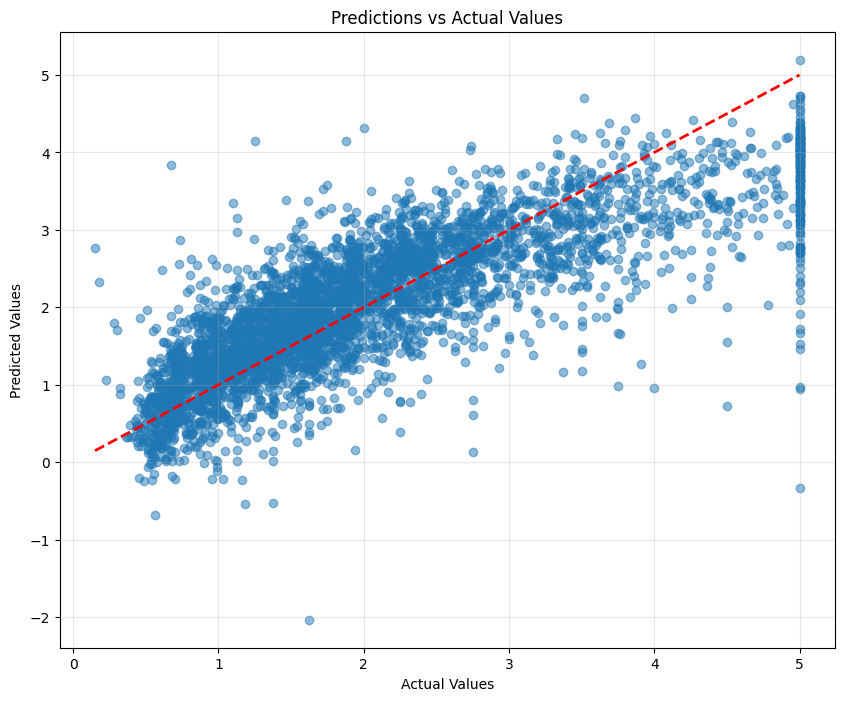

In [22]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.grid(True, alpha=0.3)
plt.show()